In [1]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

### **Detect Bounding Box of KTP**


0: 416x640 1 NIK, 1 Nama, 1 Alamat, 146.6ms
Speed: 2.8ms preprocess, 146.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


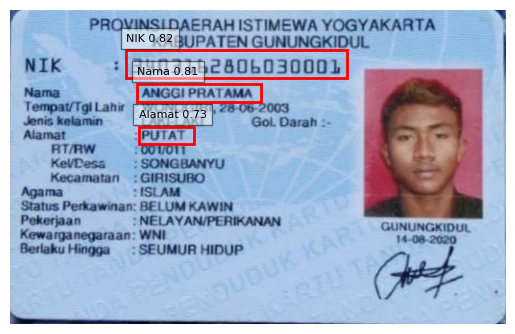

In [5]:
# Initialize YOLO model
model = YOLO("Train result/train/weights/Model_Detection_Label.pt") #path /Train result/train/weights/Model_Detection_Label.pt

# Load class names (modify this path to point to your class names file if needed)
class_names = ["NIK", "Nama", "Alamat"]  

# Detect objects in an image and display results
def detect_and_display(image_path, confidence_threshold=0.5):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image {image_path}")
        return

    # Convert BGR (OpenCV format) to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run YOLO model for detection
    results = model(img)
    boxes = results[0].boxes

    for box in boxes:
        # Extract bounding box coordinates, class index, and confidence score
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        class_idx = int(box.cls[0])  # Class index
        confidence = box.conf[0]  # Confidence score

        # Filter by confidence threshold
        if confidence < confidence_threshold:
            continue

        # Get class name
        label = class_names[class_idx] if class_idx < len(class_names) else f"Class {class_idx}"

        # Draw bounding box and label on the image (for matplotlib)
        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="red", facecolor="none")
        )
        plt.text(
            x1, y1 - 10, f"{label} {confidence:.2f}", color="black", fontsize=8, bbox=dict(facecolor="white", alpha=0.5)
        )

    # Display the image with bounding boxes
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

# Example usage
detect_and_display("inputs-ktp/test-ktp.jpg", confidence_threshold=0.7)